Загрузим данные

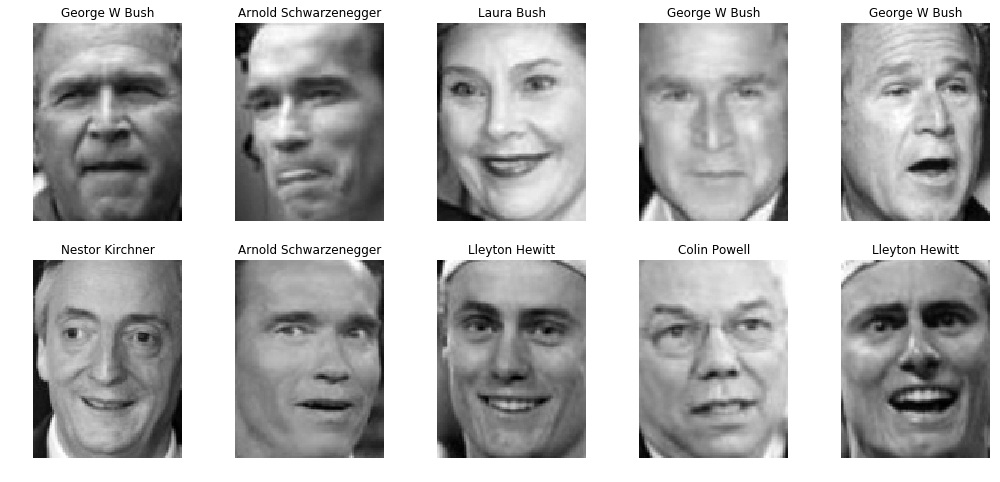

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0) 

X = lfw_people.data
y = lfw_people.target

def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)

Я выбрал алгоритм PCA. На то есть несколько причин:
<ul>
    <li>1) PCA быстрый, а TSNE долгий<\li>
    <li>2) TSNE переводит только в двух и трехмерное пространство, что для 11к фичей критично (много информации теряется)<\li>
<\ul>

Разделим выборку на тренировочную и тестовую

In [17]:
X_train = X[:int(0.2 * X.shape[0])]
y_train = y[:int(0.2 * X.shape[0])]

X_test = X[int(0.2 * X.shape[0]):]
y_test = y[int(0.2 * X.shape[0]):]

Запустим логрегрессию без сжатия данных

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5580168776371308


Давайте сначала сократим до 10% признаки, потом до 20% и т.д до 90%. Потом сравним результаты:

In [32]:
from sklearn.decomposition import PCA
ys = []
for i in range(1, 10):
    pca = PCA(n_components=X.shape[1] // 10 * i)
    cX = pca.fit(X).transform(X)
    cX_train = cX[:int(0.2 * X.shape[0])]
    cX_test = cX[int(0.2 * X.shape[0]):]
    cmodel = LogisticRegression()
    cmodel.fit(cX_train, y_train)
    ys.append(cmodel.predict(cX_test))
    print(i, "completed")

1 completed
2 completed
3 completed
4 completed
5 completed
6 completed
7 completed
8 completed
9 completed


In [45]:
yac = []
xs  = []
for i in range(1, 10):
    print(f'{i * 10}% {accuracy_score(y_test, ys[i-1])}')
    yac.append(accuracy_score(y_test, ys[i-1]))
    xs.append(i * 10)

10% 0.4277426160337553
20% 0.4361814345991561
30% 0.43829113924050633
40% 0.43829113924050633
50% 0.43829113924050633
60% 0.43829113924050633
70% 0.43829113924050633
80% 0.43829113924050633
90% 0.43829113924050633


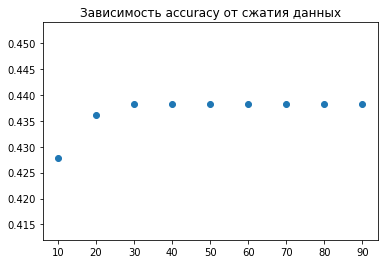

In [46]:
plt.subplot(111)
plt.title("Зависимость accuracy от сжатия данных")
plt.scatter(xs, yac)

Получается, что данные можно было сжимать с 90% до 30% не теряя результата.